Text(0.5, 1.0, 'Comparison on COVID19 Epitope Prediction dataset')

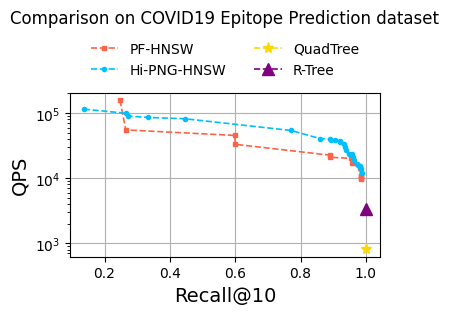

In [44]:
from function import pareto_frontier
import json, os
import matplotlib.pyplot as plt
import numpy as np

perf_output = "perf/covid19"

dataset = 'covid19-epitope-prediction-euclidean'

bb = 0

perf1 = json.load(open(os.path.join(perf_output, f"{dataset}.HNSW.json")))
perf2 = json.load(open(os.path.join(perf_output, f"{dataset}.Hi-PNG-HNSW.json")))
perf3 = json.load(open(os.path.join(perf_output, f"{dataset}.QuadTree.json")))
perf4 = json.load(open(os.path.join(perf_output, f"{dataset}.RTree.json")))
perf1 = pareto_frontier(perf1, bb)
perf2 = pareto_frontier(perf2, bb)
perf3 = pareto_frontier(perf3, bb)
perf4 = pareto_frontier(perf4, bb)
recall1 = [item["recall"] for item in perf1] 
recall2 = [item["recall"] for item in perf2]
recall3 = [item["recall"] for item in perf3]
recall4 = [item["recall"] for item in perf4]
qps1 = [item["qps"] for item in perf1]
qps2 = [item["qps"] for item in perf2]
qps3 = [item["qps"] for item in perf3]
qps4 = [item["qps"] for item in perf4]
# Plot
plt.figure(figsize=(4, 3))
plt.plot(recall1, qps1, marker='s', color='tomato', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall2, qps2, marker='o', color='deepskyblue', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall3, qps3, marker='*', color='gold', linewidth=1.2, linestyle='dashed', markersize=8)
plt.plot(recall4, qps4, marker='^', color='purple', linewidth=1.2, linestyle='dashed', markersize=8)
plt.yscale('log')
plt.xlabel('Recall@10', fontsize=14)
plt.ylabel('QPS', fontsize=14) 
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)
plt.title("RF-ANNS performance comparison on SIFT1M", loc='center', pad=20)
plt.legend(["PF-HNSW", "Hi-PNG-HNSW", "QuadTree", "R-Tree"],
           frameon=False,
           bbox_to_anchor=(0.5, 1.02),
           loc='lower center',
           ncol=2)
plt.tight_layout()
plt.title("Comparison on COVID19 Epitope Prediction dataset", loc='center', pad=50)
